In [1]:
# importing important modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Task 1 : [1 marks] 

Generate data samples that are randomly distributed on 3 concentric spheres in 3D space
with center at (1,1,1) and radius with 1, 2 and 3 respectively. Plot a 3D scatterplot of them using 3 different
colors for the points on 3 different spheres.

Text(0.5, 0.92, '3 Concentric Spheres')

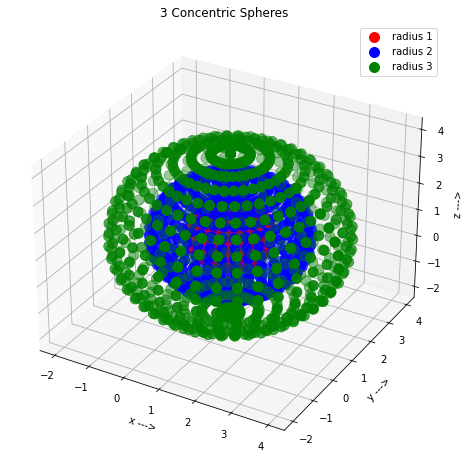

In [2]:
# creating points for first sphere with radius 1
r1=1
phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x1 = r1*np.outer(np.sin(theta), np.cos(phi))+1
y1 = r1*np.outer(np.sin(theta), np.sin(phi))+1
z1 = r1*np.outer(np.cos(theta), np.ones_like(phi))+1


# creating points for second sphere with radius 2
r2=2
phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x2 = r2*np.outer(np.sin(theta), np.cos(phi))+1
y2 = r2*np.outer(np.sin(theta), np.sin(phi))+1
z2 = r2*np.outer(np.cos(theta), np.ones_like(phi))+1

# creating points for third sphere with radius 3
r3=3
phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x3 = r3*np.outer(np.sin(theta), np.cos(phi))+1
y3 = r3*np.outer(np.sin(theta), np.sin(phi))+1
z3 = r3*np.outer(np.cos(theta), np.ones_like(phi))+1

# I added +1 in every point to make the centre 1,1,1 for each sphere

# plotting all the spheres in 3D
fig, ax = plt.subplots(1, 1,figsize=(8,8) ,subplot_kw={'projection':'3d', 'aspect':'auto'})

# plotting the first sphere
ax.scatter(x1, y1, z1, s=100, c='r', zorder=10,label='radius 1')
# plotting the second sphere
ax.scatter(x2,y2,z2, s=100, c='b', zorder=10,label='radius 2')
# plotting the third sphere
ax.scatter(x3, y3, z3, s=100, c='g', zorder=10,label='radius 3')

# plotting the legend
plt.legend()

ax.set_xlabel('x --->')
ax.set_ylabel('y --->')
ax.set_zlabel('z --->')
plt.title('3 Concentric Spheres')

In [3]:
# storing all the points together
X=[]

# checking the shape for running the loop
shape=x1.shape

# taking all points of sphere 1 and storing in X
for i in range(shape[0]):
    for j in range(shape[1]):
        X.append([x1[i][j],y1[i][j],z1[i][j]])

# taking all points of sphere 2 and storing in X
for i in range(shape[0]):
    for j in range(shape[1]):
        X.append([x2[i][j],y2[i][j],z2[i][j]])
        
# taking all points of sphere 3 and storing in X
for i in range(shape[0]):
    for j in range(shape[1]):
        X.append([x3[i][j],y3[i][j],z3[i][j]])

In [4]:
# making the target labels for each point
y=[1]*800+[2]*800+[3]*800

# storing labels together with the corrresponding points
for i in range(len(X)):
    X[i].append(y[i])

In [5]:
# showing the points in a dataframe
df=pd.DataFrame(X,columns=['x','y','z','r'])
df.head()

,x,y,z,r
0,1.0,1.0,2.0,1
1,1.0,1.0,2.0,1
2,1.0,1.0,2.0,1
3,1.0,1.0,2.0,1
4,1.0,1.0,2.0,1


# Task2 : [4 marks] 

Find the 2D presentation of these samples using Linear PCA, PCA with a polynomial kernel
with degree 5, and PCA with Gaussian kernel. Please select the width of the Gaussian kernel appropriately
so that samples from 3 classes become well separated from each other in their 2D projection. 

In [6]:
# importing PCA and kernel PCA
from sklearn.decomposition import PCA, KernelPCA

In [7]:
# Applying the linear PCA
linear=PCA(n_components=2)

# tranforming the data
linear_pca=linear.fit_transform(X)

# creating a dataframe for final components
principaldf=pd.DataFrame(data=linear_pca,columns=["Principle Component 1","Principle Component 2"])


# creating the final dataframe with labels
finaldf=pd.concat([principaldf,df['r']],axis=1)
finaldf.head()


,Principle Component 1,Principle Component 2,r
0,-0.940281,2.660496e-15,1
1,-0.940281,-3.531603e-15,1
2,-0.940281,1.035231e-15,1
3,-0.940281,9.267743e-16,1
4,-0.940281,5.745356e-16,1


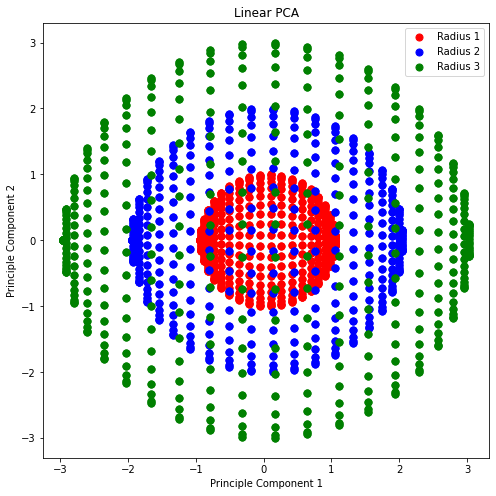

In [8]:
# target values
targets=[1,2,3]
# corresponding colors
colors = ['r','b','g']

# defining figsize
fig = plt.figure(figsize = (8,8))


ax=fig.add_subplot(1,1,1)

labels=['Radius 1', 'Radius 2','Radius 3']
for target,color,label in zip(targets,colors,labels):
    # if target equal to label store the indices
    indices=finaldf['r']==target
    # plot the components of the indices we saved
    ax.scatter(finaldf.loc[indices,'Principle Component 1'],finaldf.loc[indices,'Principle Component 2'],c=color,s=50,label=label)

plt.title('Linear PCA')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.show()

In [9]:
# Applying Poly PCA
poly=KernelPCA(n_components=2,kernel='poly',degree=5)

# transforming the data
poly_pca=poly.fit_transform(X)

# creating a dataframe for final components
principaldf=pd.DataFrame(data=poly_pca,columns=["Principle Component 1","Principle Component 2"])

# creating the final dataframe with labels
finaldf=pd.concat([principaldf,df['r']],axis=1)
finaldf.head()

,Principle Component 1,Principle Component 2,r
0,-17.668959,-6.657466,1
1,-17.668959,-6.657466,1
2,-17.668959,-6.657466,1
3,-17.668959,-6.657466,1
4,-17.668959,-6.657466,1


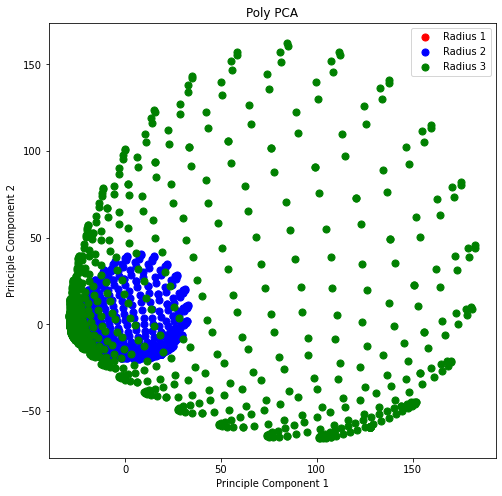

In [10]:
# target values
targets=[1,2,3]

# corresponding colors
colors = ['r','b','g']

# defining figsize
fig = plt.figure(figsize = (8,8))

ax=fig.add_subplot(1,1,1)

labels=['Radius 1', 'Radius 2','Radius 3']
for target,color,label in zip(targets,colors,labels):
    # if target equal to label store the indices
    indices=finaldf['r']==target
    # plot the components of the indices we saved
    ax.scatter(finaldf.loc[indices,'Principle Component 1'],finaldf.loc[indices,'Principle Component 2'],c=color,s=50,label=label)

plt.title('Poly PCA')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.show()

In [11]:
# Applying Gaussian PCA
gaussian=KernelPCA(n_components=2,kernel='rbf')

# Transforming the data
gaussian_pca=gaussian.fit_transform(X)

# creating a dataframe for final components
principaldf=pd.DataFrame(data=gaussian_pca,columns=["Principle Component 1","Principle Component 2"])

# creating the final dataframe with labels
finaldf=pd.concat([principaldf,df['r']],axis=1)
finaldf.head()

,Principle Component 1,Principle Component 2,r
0,0.342848,0.533551,1
1,0.342848,0.533551,1
2,0.342848,0.533551,1
3,0.342848,0.533551,1
4,0.342848,0.533551,1


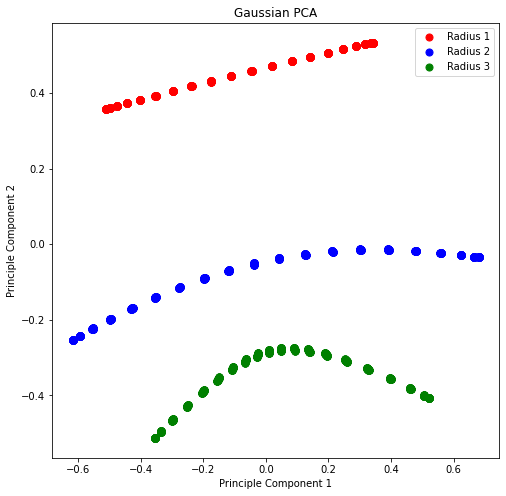

In [12]:
# target values
targets=[1,2,3]

# corresponding colors
colors = ['r','b','g']

# defining figsize
fig = plt.figure(figsize = (8,8))

ax=fig.add_subplot(1,1,1)

labels=['Radius 1', 'Radius 2','Radius 3']
for target,color,label in zip(targets,colors,labels):
    # if target equal to label store the indices
    indices=finaldf['r']==target
    # plot the components of the indices we saved
    ax.scatter(finaldf.loc[indices,'Principle Component 1'],finaldf.loc[indices,'Principle Component 2'],c=color,s=50,label=label)

plt.title('Gaussian PCA')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.show()